<a href="https://colab.research.google.com/github/PozzOver13/learning/blob/main/stats_and_probability/20240311_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy 💥

# References

https://en.wikipedia.org/wiki/Entropy Entropy Wikipedia  
https://en.wikipedia.org/wiki/Entropy_(information_theory) Information Theory  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html Scipy Stats Entropy   
Martin, Osvaldo A.; Kumar, Ravin; Lao, Junpeng. Bayesian Modeling and Computation in Python (Chapman & Hall/CRC Texts in Statistical Science) (English Edition) (p.350). CRC Press. Edizione del Kindle.

In the Zentralfriedhof, Vienna, we can find the grave of Ludwig Boltzmann. His tombstone has the  legend S = k log W, which is a beautiful way of saying that the second law of thermodynamics  is a consequence of the laws of probability.

Boltzmann contriuted to the development of one of the pillars of modern physics: Statistical mechanics which describes how macroscopic observations such as temperature are related to the microscopic world  of molecules.

If we know a system is at  0 Kelvin we know the system can only be in a single possible arrangement, as we increase the temperature the number of possible arrangements will increase  and then it will become more and more difficult to
say that molecules are in this particular arrangement at this particular time.

The  reason that entropy is so flexible is because it quantifies the arrangements of objects - it is a property  of the underlying distributions.


$H(p) = -\mathbb{E}[log p] = - \sum_{i}^{N}p_ilogp_i $

In [30]:
# Basic
import numpy as np
from scipy import stats
# import pandas as pd
# from patsy import bs, dmatrix
import matplotlib.pyplot as plt
#
# # Exploratory Analysis of Bayesian Models
# import arvix as ar
#
# # Probabilistic programming languages
# import bambi as bmb
# import pymc3 as pm
# import tensorflow_probability as tfp
#
# # Computational Backend
# import theano
# import theano.tensor as tt
# import tensorflow as tf

In [31]:
x = range(0, 26)

In [32]:
# most peaked and least spread distribution (binomial(n=10, p=0.75) -> 11 possible event)
q_pmf = stats.binom(10, 0.75).pmf(x)

In [33]:
# uniform distribution with 11 events
qu_pmf = stats.randint(0, np.max(np.nonzero(q_pmf))+1).pmf(x)

In [34]:
# taking q and shifting it to the right and then normlaizing (sum of all probabilities should be equal to 1)
r_pmf = (q_pmf + np.roll(q_pmf, 12)) / 2

In [35]:
# uniform distribution with 22 events
ru_pmf = stats.randint(0, np.max(np.nonzero(r_pmf))+1).pmf(x)

In [36]:
# same as "r" with a more extensive valley between both peaks (entropy cares only about possible events)
s_pmf = (q_pmf + np.roll(q_pmf, 15)) / 2

In [37]:
# constructed by replicing the two peaks in "s" with "qu"
su_pmf = (qu_pmf + np.roll(qu_pmf, 15)) / 2

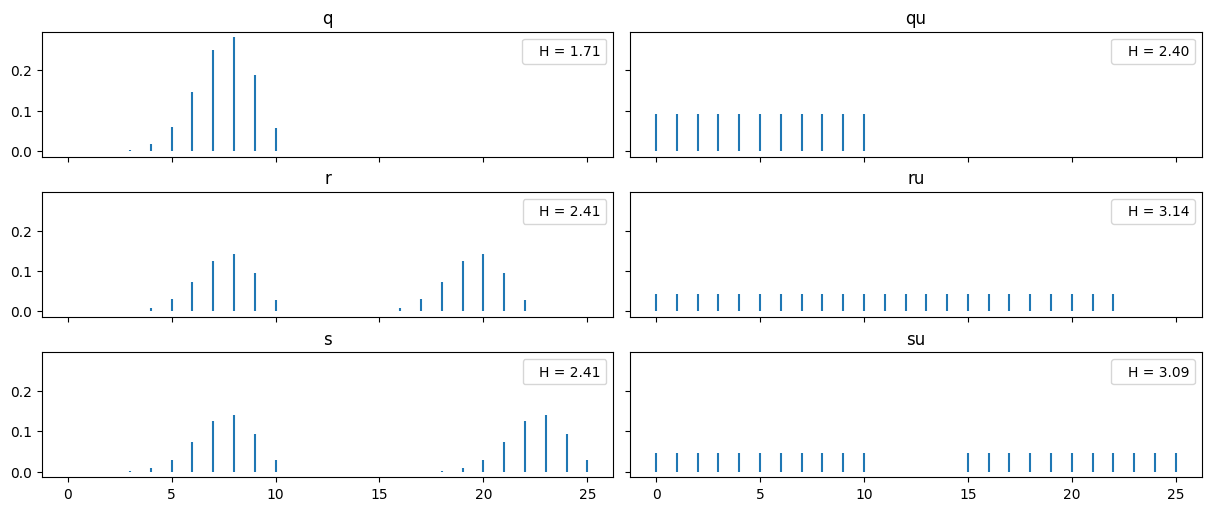

In [38]:
_, ax = plt.subplots(3, 2, figsize=(12, 5), sharex=True, sharey=True, constrained_layout=True)
ax = np.ravel(ax)

zipped = zip([q_pmf, qu_pmf, r_pmf, ru_pmf, s_pmf, su_pmf], ["q", "qu", "r", "ru", "s", "su"])

for idx, (dist, label) in enumerate(zipped):
  ax[idx].vlines(x, 0, dist, label=f'H = {stats.entropy(dist):.2f}')
  ax[idx].set_title(label)
  ax[idx].legend(loc=1, handlelength=0)

In [40]:
# why "su" entropy is lower than "ru"?

print(f"Elements greater than zero: ru -> {np.sum([ru_pmf>0])} || entropy: {stats.entropy(ru_pmf):.2f}")

print(f"Elements greater than zero: su -> {np.sum([su_pmf>0])} || entropy: {stats.entropy(su_pmf):.2f}")


Elements greater than zero: ru -> 23 || entropy: 3.14
Elements greater than zero: su -> 22 || entropy: 3.09
